# 提取指标

In [13]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


col_list = pd.read_csv('./指标/300次训练.csv',encoding='gbk',header=None)
new_col = list(col_list[col_list[0]=='制造业'][1])
new_col.append('TICKER_SYMBOL')
new_col.append('FLAG')
os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
print(csv_list)
print(csv_list[0])

['交通运输、仓储和邮政业清洗完成的数据.csv', '住宿和餐饮业清洗完成的数据.csv', '信息传输、软件和信息技术服务业清洗完成的数据.csv', '农、林、牧、渔业清洗完成的数据.csv', '制造业清洗完成的数据.csv', '卫生和社会工作清洗完成的数据.csv', '居民服务、修理和其他服务业清洗完成的数据.csv', '建筑业清洗完成的数据.csv', '房地产业清洗完成的数据.csv', '批发和零售业清洗完成的数据.csv', '教育清洗完成的数据.csv', '文化、体育和娱乐业清洗完成的数据.csv', '水利、环境和公共设施管理业清洗完成的数据.csv', '电力、热力、燃气及水生产和供应业清洗完成的数据.csv', '科学研究和技术服务业清洗完成的数据.csv', '租赁和商务服务业清洗完成的数据.csv', '综合清洗完成的数据.csv', '采矿业清洗完成的数据.csv', '金融业清洗完成的数据.csv', '问题2(1).csv', '问题2.csv']
交通运输、仓储和邮政业清洗完成的数据.csv


In [16]:
data_rate = pd.read_csv(csv_list[4])
data_rate = data_rate[new_col]
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0].sample(1000)
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,:-2],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
# import xgboost
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



clf_adaboost = AdaBoostClassifier()
clf_adaboost.fit(X_sos, y_sos)
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
auc_score = roc_auc_score(Y_te,pre_adaboost)
print(auc_score)
# pre_q2 = clf_adaboost.predict(data_Y.iloc[:,:-2])
data_Y['FLAG'] = pre_q2
data_Y.iloc[:,-2:].to_csv('问题3.csv')

# clf_RF = RandomForestClassifier()
# clf_RF.fit(X_sos, y_sos)
# pre_RF = clf_RF.predict(X_te)
# # acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# # print('RF测试集的准确率',acc_te_RF)
# print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
# print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
# auc_score = roc_auc_score(Y_te,pre_RF)
# print(auc_score)

# clf_DT = DecisionTreeClassifier()
# clf_DT.fit(X_sos, y_sos)
# pre_DT = clf_DT.predict(X_te)
# # acc_te_DT = sum(pre_DT == Y_te)/len(pre_DT)
# # print('DT测试集的准确率',acc_te_DT)
# print('Accuracy of DT Classifier:', clf_DT.score(X_te, Y_te))
# print(classification_report(Y_te, pre_DT, target_names=['0', '1']))
# auc_score = roc_auc_score(Y_te,pre_DT)
# print(auc_score)

# clf_LR = LogisticRegression()
# clf_LR.fit(X_sos, y_sos)
# pre_LR = clf_LR.predict(X_te)
# # acc_te_LR = sum(pre_LR == Y_te)/len(pre_LR)
# # print('LR测试集的准确率',acc_te_logistic)
# print('Accuracy of LR Classifier:', clf_LR.score(X_te, Y_te))
# print(classification_report(Y_te, pre_LR, target_names=['0', '1']))
# auc_score = roc_auc_score(Y_te,pre_LR)
# print(auc_score)

clf_gdbt = GradientBoostingClassifier()
clf_gdbt.fit(X_sos, y_sos)
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
auc_score = roc_auc_score(Y_te,pre_gdbt)
print(auc_score)

# clf_xgb = XGBClassifier()
# clf_xgb.fit(X_sos, y_sos)
# pre_xgb = clf_xgb.predict(X_te)
# # acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# # print('xgb测试集的准确率',acc_te_xgb)
# print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
# print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
# auc_score = roc_auc_score(Y_te,pre_xgb)
# print(auc_score)
# pre_q2 = clf_xgb.predict(data_Y.iloc[:,:-2])
# data_Y['FLAG'] = pre_q2
# data_Y.to_csv('问题2(1).csv')

# clf_SVM = SVC()
# clf_SVM.fit(X_sos, y_sos)
# pre_SVM = clf_SVM.predict(X_te)
# # acc_te_SVM  = sum(pre_SVM  == Y_te)/len(pre_SVM )
# # print('SVM 测试集的准确率',acc_te_adaboost)
# print('Accuracy of SVM Classifier:', clf_SVM.score(X_te, Y_te))
# print(classification_report(Y_te, pre_SVM, target_names=['0', '1']))
# auc_score = roc_auc_score(Y_te,pre_SVM)
# print(auc_score)

# lgb_train = lgb.Dataset(X_sos, y_sos)
# lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.04,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'verbose': -1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)
# pre_gbm = gbm.predict(X_te, num_iteration=gbm.best_iteration)
# a = []
# for i in pre_gbm:
#     if i<=0.5:
#         a.append(0)
#     else:
#         a.append(1)
# # acc_te_gbm = sum(a == Y_te)/len(pre_gbm)
# # print('lightgbm的准确率',acc_te_gbm)
# print('Accuracy of lgb Classifier:', gbm.score(X_te, Y_te))
# print(classification_report(Y_te, a, target_names=['0', '1']))

Accuracy of adaboost Classifier: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       246
           1       0.28      0.46      0.34        24

    accuracy                           0.84       270
   macro avg       0.61      0.67      0.63       270
weighted avg       0.88      0.84      0.86       270

0.6702235772357723
Accuracy of RF Classifier: 0.8962962962962963
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       246
           1       0.36      0.21      0.26        24

    accuracy                           0.90       270
   macro avg       0.64      0.59      0.60       270
weighted avg       0.88      0.90      0.88       270

0.5858739837398373
Accuracy of DT Classifier: 0.837037037037037
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       246
           1       0.19      0.25      0.21        24

 

In [17]:
X_sos.shape

(1508, 30)

In [5]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
print(tf.__version__)





2.2.0


In [103]:
model = Sequential()

In [107]:
model.add(Dense(10, input_shape=(30,), activation='relu'))

In [108]:
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 9)                 279       
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_85 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_86 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_87 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_88 (Dense)             (None, 4)               

In [109]:
Y = pd.get_dummies(y_sos).values
model.fit(X_sos, Y, epochs=20)
y_pred = model.predict(X_te)
y_pred_class = np.argmax(y_pred, axis=1)  # 其实就是记录每个数组中值最大的数的index
a = {'pre':y_pred_class,'true':Y_te}
a = pd.DataFrame(a)
a[a['true']==1]

Epoch 1/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5066
Epoch 2/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5027
Epoch 3/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5027
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.5080
Epoch 5/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5146
Epoch 6/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4907
Epoch 7/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4920: 0s - loss: 0.6937 - accuracy: 0.
Epoch 8/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4907
Epoch 9/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4920
Epoch 10/20
48/48 [==============================] - 0s 3ms/step - loss: 0.6945 - ac

,pre,true
1952,1,1
8775,1,1
5228,1,1
9702,1,1
9201,1,1
9353,1,1
2220,1,1
4093,1,1
7044,1,1
9606,1,1


In [110]:
a

,pre,true
137,1,0
9144,1,0
5893,1,0
277,1,0
1952,1,1
...,...,...
9735,1,0
8702,1,0
1638,1,0
9607,1,0


In [194]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=120)
clf.fit(X_sos, y_sos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.6654545454545454


# 未提取指标

## 采样

[05:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
训练结束


<Figure size 432x288 with 0 Axes>

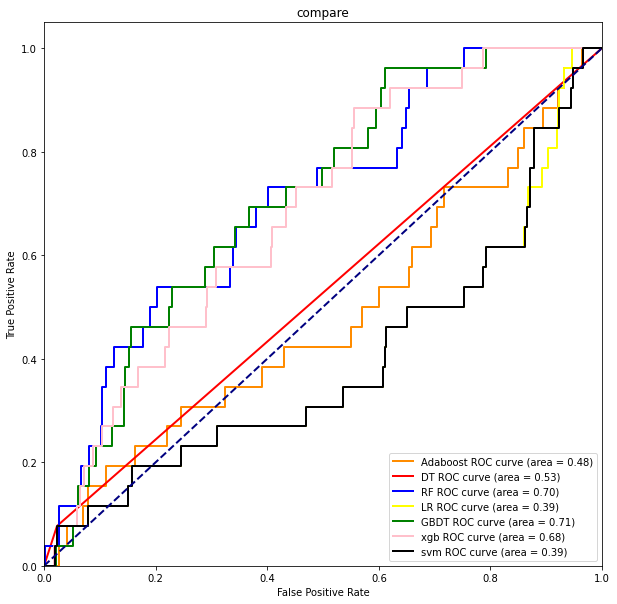

In [131]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
# print(csv_list)
# print(csv_list[0])

data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0]
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
y_score_adaboost = clf_adaboost.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
# print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
# print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
fpr_adaboost,tpr_adaboost,thresholds_adaboost = metrics.roc_curve(Y_te, y_score_adaboost, pos_label=1)
roc_auc_adaboost = metrics.auc(fpr_adaboost,tpr_adaboost)  # 计算auc的值

clf_RF = RandomForestClassifier(max_depth=4, random_state=2,n_estimators=120)
y_score_RF = clf_RF.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_RF = clf_RF.predict(X_te)
# acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# print('RF测试集的准确率',acc_te_RF)
# print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
# print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
fpr_RF,tpr_RF,thresholds_RF = metrics.roc_curve(Y_te, y_score_RF, pos_label=1)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)  # 计算auc的值

clf_DT = DecisionTreeClassifier(random_state=2)
y_score_DT = clf_DT.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
fpr_DT,tpr_DT,thresholds_DT = metrics.roc_curve(Y_te, y_score_DT, pos_label=1)
roc_auc_DT = metrics.auc(fpr_DT,tpr_DT)  # 计算auc的值
pre_DT = clf_DT.predict(X_te)
# acc_te_DT = sum(pre_DT == Y_te)/len(pre_DT)
# print('DT测试集的准确率',acc_te_DT)
# print('Accuracy of DT Classifier:', clf_DT.score(X_te, Y_te))
# print(classification_report(Y_te, pre_DT, target_names=['0', '1']))

clf_LR = LogisticRegression(random_state=2)
y_score_LR = clf_LR.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_LR = clf_LR.predict(X_te)
# acc_te_LR = sum(pre_LR == Y_te)/len(pre_LR)
# print('LR测试集的准确率',acc_te_logistic)
# print('Accuracy of LR Classifier:', clf_LR.score(X_te, Y_te))
# print(classification_report(Y_te, pre_LR, target_names=['0', '1']))
fpr_LR,tpr_LR,thresholds_LR = metrics.roc_curve(Y_te, y_score_LR, pos_label=1)
roc_auc_LR = metrics.auc(fpr_LR,tpr_LR)  # 计算auc的值


clf_gdbt = GradientBoostingClassifier(random_state=2)
y_score_GBDT = clf_gdbt.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
# print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
# print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
fpr_GBDT,tpr_GBDT,thresholds_GBDT = metrics.roc_curve(Y_te, y_score_GBDT, pos_label=1)
roc_auc_GBDT = metrics.auc(fpr_GBDT,tpr_GBDT)  # 计算auc的值

clf_xgb = XGBClassifier(random_state=2)
y_score_xgb = clf_xgb.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_xgb = clf_xgb.predict(X_te)
# acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# print('xgb测试集的准确率',acc_te_xgb)
# print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
# print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
fpr_xgb,tpr_xgb,thresholds_xgb = metrics.roc_curve(Y_te, y_score_xgb, pos_label=1)
roc_auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)  # 计算auc的值

clf_svm = SVC(probability=True,random_state=2)
y_score_svm=clf_svm.fit(X_sos,y_sos).predict_proba(X_te)[:,1]
fpr_svm,tpr_svm,thresholds_svm = metrics.roc_curve(Y_te, y_score_svm, pos_label=1)
roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)  # 计算auc的值
print('训练结束')
# lgb_train = lgb.Dataset(X_sos, y_sos)
# lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.04,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'verbose': -1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)
# pre_gbm = gbm.predict(X_te, num_iteration=gbm.best_iteration)
# a = []
# for i in pre_gbm:
#     if i<=0.5:
#         a.append(0)
#     else:
#         a.append(1)
# # acc_te_gbm = sum(a == Y_te)/len(pre_gbm)
# # print('lightgbm的准确率',acc_te_gbm)
# print('Accuracy of lgb Classifier:', gbm.score(X_te, Y_te))
# print(classification_report(Y_te, a, target_names=['0', '1']))




# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))

plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange',lw=lw,label='Adaboost ROC curve (area = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_DT, tpr_DT, color='red',lw=lw,label='DT ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='blue',lw=lw,label='RF ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_LR, tpr_LR, color='yellow',lw=lw,label='LR ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_GBDT, tpr_GBDT, color='green',lw=lw,label='GBDT ROC curve (area = %0.2f)' % roc_auc_GBDT)
plt.plot(fpr_xgb, tpr_xgb, color='pink',lw=lw,label='xgb ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='black',lw=lw,label='svm ROC curve (area = %0.2f)' % roc_auc_svm)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('compare')
plt.legend(loc="lower right")
plt.savefig('ROC的对比.png')
plt.show()

## 未采样

['交通运输、仓储和邮政业清洗完成的数据.csv', '住宿和餐饮业清洗完成的数据.csv', '信息传输、软件和信息技术服务业清洗完成的数据.csv', '农、林、牧、渔业清洗完成的数据.csv', '制造业清洗完成的数据.csv', '卫生和社会工作清洗完成的数据.csv', '居民服务、修理和其他服务业清洗完成的数据.csv', '建筑业清洗完成的数据.csv', '房地产业清洗完成的数据.csv', '批发和零售业清洗完成的数据.csv', '教育清洗完成的数据.csv', '文化、体育和娱乐业清洗完成的数据.csv', '水利、环境和公共设施管理业清洗完成的数据.csv', '电力、热力、燃气及水生产和供应业清洗完成的数据.csv', '科学研究和技术服务业清洗完成的数据.csv', '租赁和商务服务业清洗完成的数据.csv', '综合清洗完成的数据.csv', '采矿业清洗完成的数据.csv', '金融业清洗完成的数据.csv']
交通运输、仓储和邮政业清洗完成的数据.csv
Accuracy of adaboost Classifier: 0.9919549477071601
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2468
           1       0.00      0.00      0.00        18

    accuracy                           0.99      2486
   macro avg       0.50      0.50      0.50      2486
weighted avg       0.99      0.99      0.99      2486

Accuracy of RF Classifier: 0.9927594529364441
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2468
           1   

<Figure size 432x288 with 0 Axes>

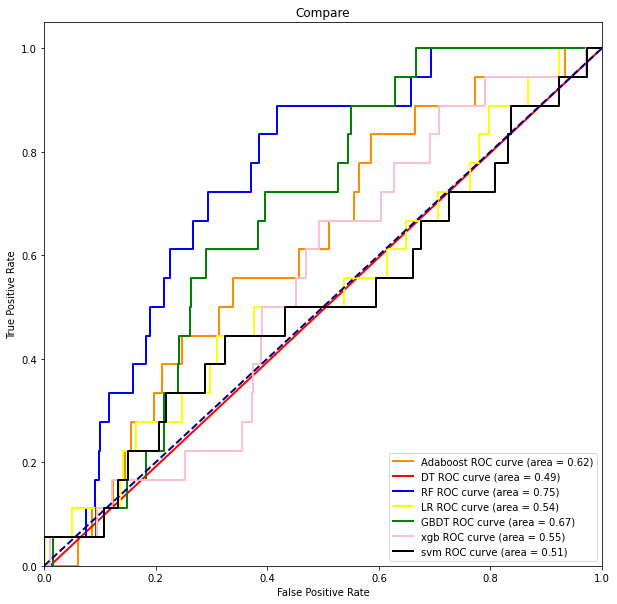

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
print(csv_list)
print(csv_list[0])

data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0]
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

# sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = X_tr, Y_tr

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
y_score_adaboost = clf_adaboost.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
fpr_adaboost,tpr_adaboost,thresholds_adaboost = metrics.roc_curve(Y_te, y_score_adaboost, pos_label=1)
roc_auc_adaboost = metrics.auc(fpr_adaboost,tpr_adaboost)  # 计算auc的值

clf_RF = RandomForestClassifier(max_depth=4, random_state=2)
y_score_RF = clf_RF.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_RF = clf_RF.predict(X_te)
# acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# print('RF测试集的准确率',acc_te_RF)
print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
fpr_RF,tpr_RF,thresholds_RF = metrics.roc_curve(Y_te, y_score_RF, pos_label=1)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)  # 计算auc的值

clf_DT = DecisionTreeClassifier(random_state=2)
y_score_DT = clf_DT.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
fpr_DT,tpr_DT,thresholds_DT = metrics.roc_curve(Y_te, y_score_DT, pos_label=1)
roc_auc_DT = metrics.auc(fpr_DT,tpr_DT)  # 计算auc的值
pre_DT = clf_DT.predict(X_te)
# acc_te_DT = sum(pre_DT == Y_te)/len(pre_DT)
# print('DT测试集的准确率',acc_te_DT)
print('Accuracy of DT Classifier:', clf_DT.score(X_te, Y_te))
print(classification_report(Y_te, pre_DT, target_names=['0', '1']))

clf_LR = LogisticRegression(random_state=2)
y_score_LR = clf_LR.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_LR = clf_LR.predict(X_te)
# acc_te_LR = sum(pre_LR == Y_te)/len(pre_LR)
# print('LR测试集的准确率',acc_te_logistic)
print('Accuracy of LR Classifier:', clf_LR.score(X_te, Y_te))
print(classification_report(Y_te, pre_LR, target_names=['0', '1']))
fpr_LR,tpr_LR,thresholds_LR = metrics.roc_curve(Y_te, y_score_LR, pos_label=1)
roc_auc_LR = metrics.auc(fpr_LR,tpr_LR)  # 计算auc的值


clf_gdbt = GradientBoostingClassifier(random_state=2)
y_score_GBDT = clf_gdbt.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
fpr_GBDT,tpr_GBDT,thresholds_GBDT = metrics.roc_curve(Y_te, y_score_GBDT, pos_label=1)
roc_auc_GBDT = metrics.auc(fpr_GBDT,tpr_GBDT)  # 计算auc的值

clf_xgb = XGBClassifier(random_state=2)
y_score_xgb = clf_xgb.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_xgb = clf_xgb.predict(X_te)
# acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# print('xgb测试集的准确率',acc_te_xgb)
print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
fpr_xgb,tpr_xgb,thresholds_xgb = metrics.roc_curve(Y_te, y_score_xgb, pos_label=1)
roc_auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)  # 计算auc的值

clf_svm = SVC(probability=True,random_state=2)
y_score_svm=clf_svm.fit(X_sos,y_sos).predict_proba(X_te)[:,1]
fpr_svm,tpr_svm,thresholds_svm = metrics.roc_curve(Y_te, y_score_svm, pos_label=1)
roc_auc_svm = metrics.auc(fpr_svm,tpr_svm)  # 计算auc的值
print('训练结束')
# lgb_train = lgb.Dataset(X_sos, y_sos)
# lgb_eval = lgb.Dataset(X_te, Y_te, reference=lgb_train)
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',  # 设置提升类型
#     'objective': 'regression',  # 目标函数
#     'metric': {'l2', 'auc'},  # 评估函数
#     'num_leaves': 31,  # 叶子节点数
#     'learning_rate': 0.04,  # 学习速率
#     'feature_fraction': 0.9,  # 建树的特征选择比例
#     'bagging_fraction': 0.8,  # 建树的样本采样比例
#     'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
#     'verbose': -1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=400, valid_sets=lgb_eval, early_stopping_rounds=200)
# pre_gbm = gbm.predict(X_te, num_iteration=gbm.best_iteration)
# a = []
# for i in pre_gbm:
#     if i<=0.5:
#         a.append(0)
#     else:
#         a.append(1)
# # acc_te_gbm = sum(a == Y_te)/len(pre_gbm)
# # print('lightgbm的准确率',acc_te_gbm)
# print('Accuracy of lgb Classifier:', gbm.score(X_te, Y_te))
# print(classification_report(Y_te, a, target_names=['0', '1']))




# 绘制roc曲线
plt.figure()
lw = 2
plt.figure(figsize=(10,10))

plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange',lw=lw,label='Adaboost ROC curve (area = %0.2f)' % roc_auc_adaboost)
plt.plot(fpr_DT, tpr_DT, color='red',lw=lw,label='DT ROC curve (area = %0.2f)' % roc_auc_DT)
plt.plot(fpr_RF, tpr_RF, color='blue',lw=lw,label='RF ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_LR, tpr_LR, color='yellow',lw=lw,label='LR ROC curve (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_GBDT, tpr_GBDT, color='green',lw=lw,label='GBDT ROC curve (area = %0.2f)' % roc_auc_GBDT)
plt.plot(fpr_xgb, tpr_xgb, color='pink',lw=lw,label='xgb ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_svm, tpr_svm, color='black',lw=lw,label='svm ROC curve (area = %0.2f)' % roc_auc_svm)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare')
plt.legend(loc="lower right")
plt.savefig('ROC对比2.png')
plt.show()

## 训练+提取指标

In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
# print(csv_list)
# print(csv_list[0])

data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0]
X_0 = X_0.append(X_1)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],test_size=0.25)   # 拆分训练集、测试集,12,134

# sos = SMOTE(random_state=0)  # SMOTE采样
X_sos, y_sos = X_tr, Y_tr

from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

clf_adaboost = AdaBoostClassifier(n_estimators=500, random_state=2,learning_rate=0.3)
y_score_adaboost = clf_adaboost.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_adaboost = clf_adaboost.predict(X_te)
# acc_te_adaboost = sum(pre_adaboost == Y_te)/len(pre_adaboost)
# print('adaboost测试集的准确率',acc_te_adaboost)
# print('Accuracy of adaboost Classifier:', clf_adaboost.score(X_te, Y_te))
# print(classification_report(Y_te, pre_adaboost, target_names=['0', '1']))
fpr_adaboost,tpr_adaboost,thresholds_adaboost = metrics.roc_curve(Y_te, y_score_adaboost, pos_label=1)
roc_auc_adaboost = metrics.auc(fpr_adaboost,tpr_adaboost)  # 计算auc的值

clf_RF = RandomForestClassifier(max_depth=4, random_state=2)
y_score_RF = clf_RF.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_RF = clf_RF.predict(X_te)
# acc_te_RF = sum(pre_RF == Y_te)/len(pre_RF)
# print('RF测试集的准确率',acc_te_RF)
# print('Accuracy of RF Classifier:', clf_RF.score(X_te, Y_te))
# print(classification_report(Y_te, pre_RF, target_names=['0', '1']))
fpr_RF,tpr_RF,thresholds_RF = metrics.roc_curve(Y_te, y_score_RF, pos_label=1)
roc_auc_RF = metrics.auc(fpr_RF,tpr_RF)  # 计算auc的值
clf_RF.feature_importances_
RF_features = []
indices = np.argsort(clf_RF.feature_importances_)[::-1]
for i in X_tr.columns.values[:][indices][:40]:
    RF_features.append(i)
print(RF_features)


clf_gdbt = GradientBoostingClassifier(random_state=2)
y_score_GBDT = clf_gdbt.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_gdbt = clf_gdbt.predict(X_te)
# acc_te_gdbt = sum(pre_gdbt == Y_te)/len(pre_gdbt)
# print('GBDT测试集的准确率',acc_te_gdbt)
# print('Accuracy of GBDT Classifier:', clf_gdbt.score(X_te, Y_te))
# print(classification_report(Y_te, pre_gdbt, target_names=['0', '1']))
fpr_GBDT,tpr_GBDT,thresholds_GBDT = metrics.roc_curve(Y_te, y_score_GBDT, pos_label=1)
roc_auc_GBDT = metrics.auc(fpr_GBDT,tpr_GBDT)  # 计算auc的值

clf_xgb = XGBClassifier(random_state=2)
y_score_xgb = clf_xgb.fit(X_sos, y_sos).predict_proba(X_te)[:,1]
pre_xgb = clf_xgb.predict(X_te)
# acc_te_xgb = sum(pre_xgb == Y_te)/len(pre_xgb)
# print('xgb测试集的准确率',acc_te_xgb)
# print('Accuracy of xgb Classifier:', clf_xgb.score(X_te, Y_te))
# print(classification_report(Y_te, pre_xgb, target_names=['0', '1']))
fpr_xgb,tpr_xgb,thresholds_xgb = metrics.roc_curve(Y_te, y_score_xgb, pos_label=1)
roc_auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)  # 计算auc的值

Accuracy of adaboost Classifier: 0.9903459372485921
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2465
           1       0.00      0.00      0.00        21

    accuracy                           0.99      2486
   macro avg       0.50      0.50      0.50      2486
weighted avg       0.98      0.99      0.99      2486

['PREPAYMENT', 'INCOME_TAX', 'CASH_C_EQUIV', 'ADMIN_EXP', 'T_REVENUE', 'T_CA', 'N_CE_BEG_BAL', 'C_OUTF_FR_INVEST_A', 'INVENTORIES', 'C_OUTF_FR_FINAN_A', 'RETAINED_EARNINGS', 'OTH_RECEIV', 'N_CF_OPERATE_A', 'REVENUE', 'DEFER_TAX_ASSETS', 'T_EQUITY_ATTR_P', 'N_CE_END_BAL', 'COGS', 'INVEST_INCOME', 'PAID_IN_CAPITAL', 'C_INF_FR_OPERATE_A', 'TAXES_PAYABLE', 'GOING_CONCERN_NI', 'T_SH_EQUITY', 'DILUTED_EPS', 'C_OUTF_OPERATE_A', 'N_INCOME', 'LT_EQUITY_INVEST', 'FIXED_ASSETS', 'ADVANCE_RECEIPTS', 'CIP', 'T_NCA', 'T_PROFIT', 'MINORITY_INT', 'INT_PAYABLE', 'OPERATE_PROFIT', 'T_NCL', 'OTH_PAYABLE', 'C_PAID_DIV_PROF_INT', 'DEF

# 调参

## Adaboost调参

In [2]:
import os
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from imblearn.combine import SMOTETomek   # 综合采样
from collections import Counter

filelist = os.listdir()
csv_list = [x for x in filelist if 'csv' in x]
data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0].head(240) # .head(240)
X_0 = X_0.append(X_1)


X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],random_state=1,test_size=0.3)   # 拆分训练集、测试集

kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_tr, Y_tr)

clf = AdaBoostClassifier()
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### learning_rate

In [155]:
clf = AdaBoostClassifier(n_estimators=400, random_state=2,learning_rate=0.3)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.4642857142857143


In [76]:
clf = AdaBoostClassifier(random_state=2)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8907042253521127


In [77]:
clf = AdaBoostClassifier(random_state=2,learning_rate=0.5)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8577464788732394


In [78]:
clf = AdaBoostClassifier(random_state=2,learning_rate=0.75)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.823661971830986


In [79]:
clf = AdaBoostClassifier(random_state=2,learning_rate=0.9)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8307042253521126


In [88]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1.3)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8847887323943661


In [91]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1.5)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7754929577464789


### n_estimators

In [85]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1,n_estimators=50)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8907042253521127


In [81]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1,n_estimators=40)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8307042253521126


In [82]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1,n_estimators=30)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8507042253521127


In [83]:
clf = AdaBoostClassifier(random_state=2,learning_rate=1,n_estimators=20)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8707042253521127


### 提取指标

['DISP_FIX_ASSETS_OTH', 'FOREX_EFFECTS', 'SELL_EXP', 'C_PAID_INVEST', 'FINAN_EXP', 'C_PAID_G_S', 'TAXES_PAYABLE', 'REFUND_OF_TAX', 'INVEST_INCOME', 'OTH_PAYABLE', 'BIZ_TAX_SURCHG', 'NOPERATE_EXP', 'C_PAID_OTH_FINAN_A', 'C_FR_BORR', 'CAPITAL_RESER', 'INT_PAYABLE', 'NOTES_RECEIV', 'OTH_COMPRE_INCOME', 'C_PAID_FOR_TAXES', 'C_INF_FR_OPERATE_A']


<Figure size 432x288 with 0 Axes>

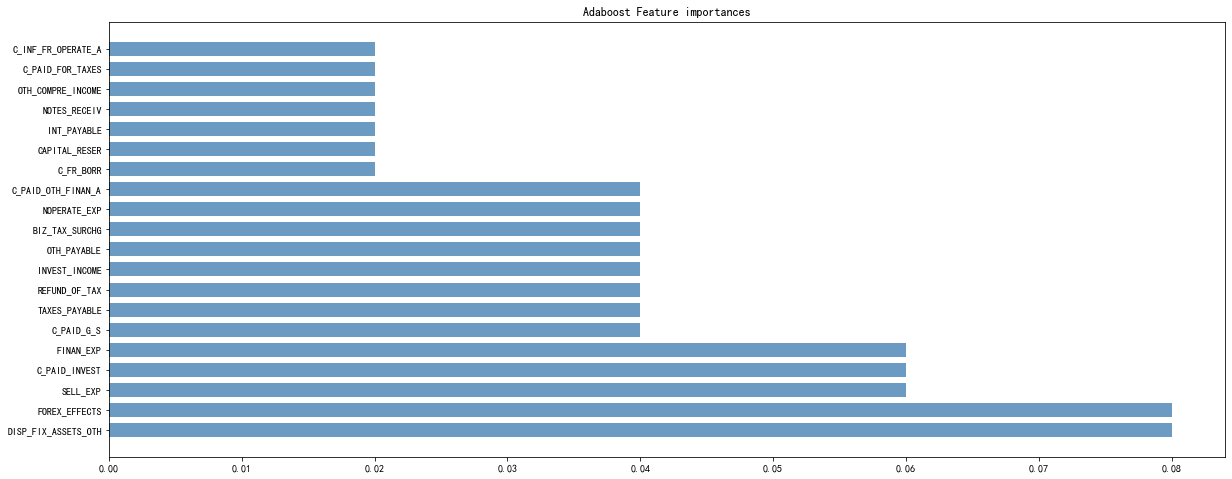

In [182]:
clf = AdaBoostClassifier(random_state=2)
clf.fit(X_kos, y_kos)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
clf.feature_importances_
Ada_features = []
indices = np.argsort(clf.feature_importances_)[::-1]
for i in X_tr.columns.values[:][indices][:20]:
    Ada_features.append(i)
print(Ada_features)

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(clf.feature_importances_)[::-1]  # 先将值按大小排序再提取索引

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("Adaboost Feature importances")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

plt.barh(range(20), clf.feature_importances_[indices][:20], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(20), X_kos.columns.values[:][indices][:20])
# plt.xlim([0, max(clf.feature_importances_[indices])])
plt.savefig('Adaboost.png')
plt.show()

## GBDT

In [158]:
import os
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier # GBDT
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from imblearn.combine import SMOTETomek   # 综合采样
from collections import Counter

filelist = os.listdir()
csv_list = [x for x in filelist if 'csv' in x]
data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0].head(240) # .head(240)
X_0 = X_0.append(X_1)


X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],random_state=1,test_size=0.3)   # 拆分训练集、测试集

kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_tr, Y_tr)

clf = GradientBoostingClassifier(random_state=2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8318309859154929


### learning_rate 

In [93]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.7)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8529577464788732


In [94]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8247887323943661


In [95]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.3)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8177464788732394


In [96]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [97]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.8)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8388732394366198


### n_estimators 

In [103]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=140)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [104]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=90)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8588732394366198


In [105]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=80)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [106]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=70)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


### min_samples_split 

In [107]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [108]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=3)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8459154929577465


In [110]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=4)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8588732394366198


In [111]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8588732394366198


In [112]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=6)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8588732394366198


### min_samples_leaf 

In [113]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=1)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [114]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8318309859154929


In [115]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=3)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8318309859154929


In [116]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=0.5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.6484507042253521


### min_weight_fraction_leaf

In [121]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [122]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.6425352112676056


In [123]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.1)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8247887323943661


In [124]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.6484507042253521


### max_depth 

In [125]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [126]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=4)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8247887323943661


In [127]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8447887323943661


In [128]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=6)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8259154929577467


In [129]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=7)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7307042253521127


### min_impurity_decrease

In [130]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8659154929577465


In [131]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.1)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.811830985915493


In [132]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.811830985915493


In [133]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.3)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8447887323943661


In [134]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.4)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8447887323943661


In [135]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8588732394366198


In [136]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0.6)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8388732394366198


### 提取指标

['GOING_CONCERN_NI', 'RETAINED_EARNINGS', 'C_PAID_FOR_TAXES', 'FOREX_EFFECTS', 'OTH_COMPR_INCOME', 'N_CHANGE_IN_CASH', 'MINORITY_GAIN', 'C_INF_FR_OPERATE_A', 'ASSETS_IMPAIR_LOSS', 'N_INCOME', 'OPERATE_PROFIT', 'BASIC_EPS', 'N_CF_FR_FINAN_A', 'N_CF_FR_INVEST_A', 'LT_EQUITY_INVEST', 'INVEST_INCOME', 'MINORITY_INT', 'C_PAID_INVEST', 'OTH_COMPRE_INCOME', 'C_PAID_OTH_FINAN_A']


<Figure size 432x288 with 0 Axes>

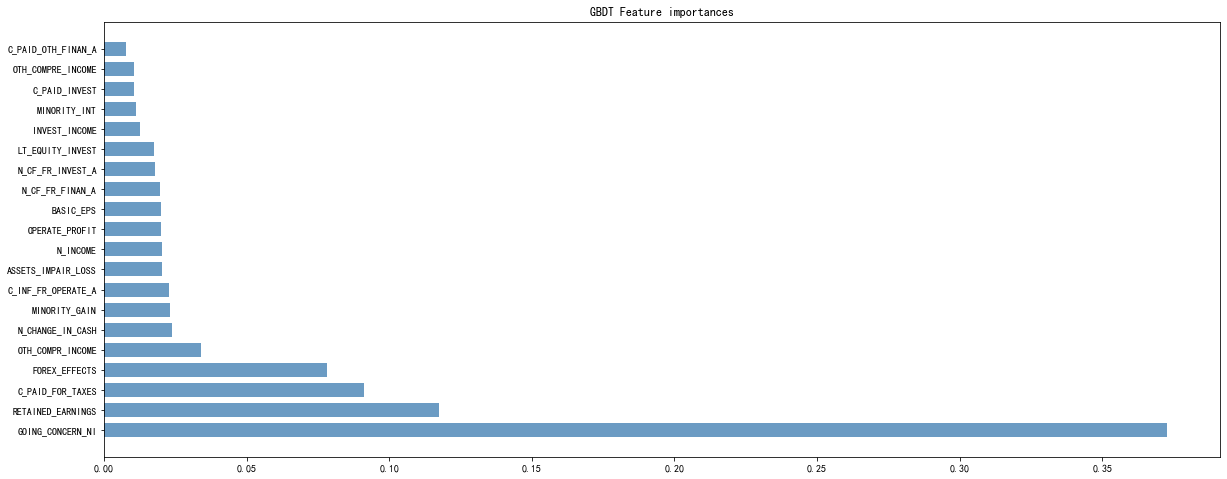

In [183]:
clf = GradientBoostingClassifier(random_state=2,learning_rate=0.9,n_estimators=100,min_samples_split=2,
                                 min_samples_leaf=1,min_weight_fraction_leaf=0,max_depth=3,min_impurity_decrease=0)
clf.fit(X_tr, Y_tr)
GBDT_features = []
indices = np.argsort(clf.feature_importances_)[::-1]
for i in X_tr.columns.values[:][indices][:20]:
    GBDT_features.append(i)
print(GBDT_features)
indices = np.argsort(clf.feature_importances_)[::-1]  # 先将值按大小排序再提取索引

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("GBDT Feature importances")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

plt.barh(range(20), clf.feature_importances_[indices][:20], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(20), X_kos.columns.values[:][indices][:20])
# plt.xlim([0, max(clf.feature_importances_[indices])])
plt.savefig('GBDT.png')
plt.show()

## RF

In [111]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # 随机森林
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from imblearn.combine import SMOTETomek   # 综合采样
from collections import Counter

filelist = os.listdir()
csv_list = [x for x in filelist if 'csv' in x]
data_rate = pd.read_csv(csv_list[4])
data_X = data_rate[~data_rate['FLAG'].isnull()]
data_Y = data_rate[data_rate['FLAG'].isnull()]
data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
X_1 = data_X[data_X['FLAG']==1]
X_0 = data_X[data_X['FLAG']==0].head(240) # .head(240)
X_0 = X_0.append(X_1)


X_tr, X_te, Y_tr, Y_te = train_test_split(X_0.iloc[:,12:-1],X_0.iloc[:,-1],random_state=1,test_size=0.3)   # 拆分训练集、测试集

kos = SMOTETomek(random_state=0)  # 综合采样
X_kos, y_kos = kos.fit_resample(X_tr, Y_tr)

clf = RandomForestClassifier(random_state=2)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7729577464788733


### max_depth 

In [112]:
clf = RandomForestClassifier(random_state=2,max_depth=11)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7529577464788733


In [113]:
clf = RandomForestClassifier(random_state=2,max_depth=9)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7529577464788733


In [114]:
clf = RandomForestClassifier(random_state=2,max_depth=5)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7129577464788732


In [115]:
clf = RandomForestClassifier(random_state=2,max_depth=7)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7529577464788733


In [116]:
clf = RandomForestClassifier(random_state=2,max_depth=11)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7529577464788733


In [117]:
clf = RandomForestClassifier(random_state=2,max_depth=12)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7529577464788733


### n_estimators 

In [118]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=150)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7788732394366198


In [119]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=120)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8129577464788733


In [120]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=110)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7929577464788733


In [121]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=130)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8059154929577466


In [122]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=140)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8059154929577466


In [123]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=200)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7988732394366198


In [124]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=500)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7988732394366198


In [125]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=1000)
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7659154929577465


In [129]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=120,max_features='sqrt')
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.8129577464788733


In [130]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=120,criterion='entropy')
clf.fit(X_tr, Y_tr)
pre = clf.predict(X_te)
auc_score = roc_auc_score(Y_te,pre)
print(auc_score)

0.7259154929577465


### 提取指标

['GOING_CONCERN_NI', 'RETAINED_EARNINGS', 'C_PAID_FOR_TAXES', 'FOREX_EFFECTS', 'OTH_COMPR_INCOME', 'N_CHANGE_IN_CASH', 'MINORITY_GAIN', 'C_INF_FR_OPERATE_A', 'ASSETS_IMPAIR_LOSS', 'N_INCOME', 'OPERATE_PROFIT', 'BASIC_EPS', 'N_CF_FR_FINAN_A', 'N_CF_FR_INVEST_A', 'LT_EQUITY_INVEST', 'INVEST_INCOME', 'MINORITY_INT', 'C_PAID_INVEST', 'OTH_COMPRE_INCOME', 'C_PAID_OTH_FINAN_A', 'GOING_CONCERN_NI', 'FOREX_EFFECTS', 'RETAINED_EARNINGS', 'BASIC_EPS', 'DILUTED_EPS', 'N_CHANGE_IN_CASH', 'PAID_IN_CAPITAL', 'COMPR_INC_ATTR_M_S', 'OPERATE_PROFIT', 'OTH_PAYABLE', 'REVENUE', 'INCOME_TAX', 'MINORITY_GAIN', 'T_PROFIT', 'C_OUTF_FR_INVEST_A', 'T_NCL', 'ASSETS_IMPAIR_LOSS', 'PAYROLL_PAYABLE', 'DISP_FIX_ASSETS_OTH', 'C_FR_SALE_G_S']


<Figure size 432x288 with 0 Axes>

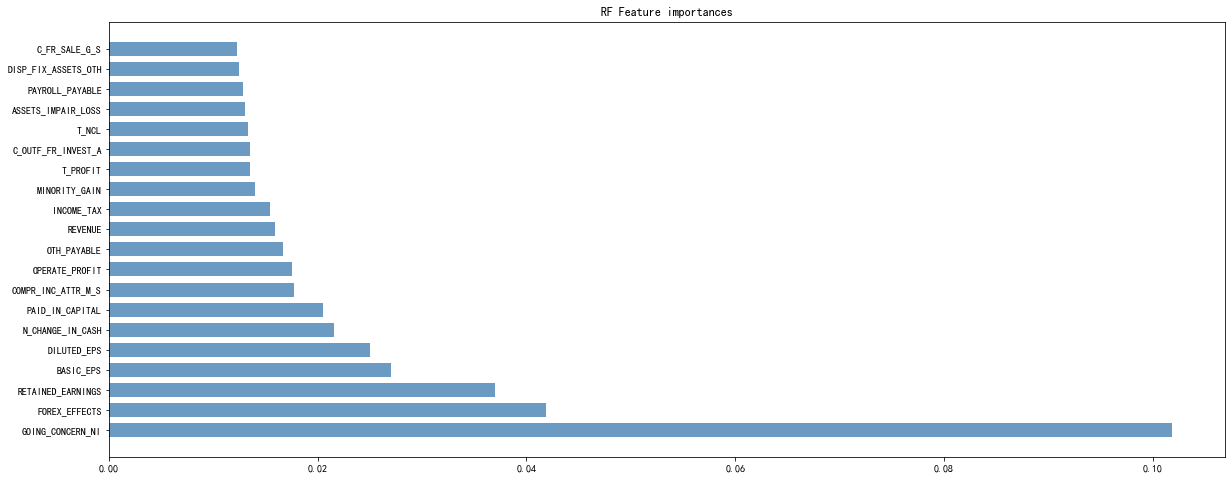

In [184]:
clf = RandomForestClassifier(random_state=2,max_depth=None,n_estimators=120)
clf.fit(X_tr, Y_tr)
RF_features = []
indices = np.argsort(clf.feature_importances_)[::-1]
for i in X_tr.columns.values[:][indices][:20]:
    GBDT_features.append(i)
print(GBDT_features)
indices = np.argsort(clf.feature_importances_)[::-1]  # 先将值按大小排序再提取索引

# 绘图过程
plt.figure()
plt.figure(figsize=(20,8))
plt.title("RF Feature importances")

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] =False

plt.barh(range(20), clf.feature_importances_[indices][:20], height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(20), X_kos.columns.values[:][indices][:20])
# plt.xlim([0, max(clf.feature_importances_[indices])])
plt.savefig('RF.png')
plt.show()

# 预测

In [136]:
filelist = os.listdir()

csv_list = [x for x in filelist if 'csv' in x]
csv_list[3][:-11]

'农、林、牧、渔业'

In [152]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE   # SMOTE采样
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier  # 随机森林
import lightgbm as lgb # lightgbm
from sklearn.ensemble import GradientBoostingClassifier # GBDT
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
# import xgboost
# from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score



os.getcwd()  # 'C:\\Users\\dell\\zhaoxuan'
os.listdir()  # 列出所有文件

filelist = os.listdir()

csv_list = [x for x in filelist if '数据.csv' in x]
print(csv_list)
print(csv_list[0])

for i in range(len(csv_list)):
    
    col_list = pd.read_csv('./指标/300次训练.csv',encoding='gbk',header=None)
    new_col = list(col_list[col_list[0]==(csv_list[i][:-11])][1])
    new_col.append('TICKER_SYMBOL')
    new_col.append('FLAG')
    data_rate = pd.read_csv(csv_list[i])
    data_rate = data_rate[new_col]
    data_X = data_rate[~data_rate['FLAG'].isnull()]
    data_Y = data_rate[data_rate['FLAG'].isnull()]
    data_X['FLAG'] = data_X['FLAG'].apply(lambda x :int(x))
    X_1 = data_X[data_X['FLAG']==1]
    X_0 = data_X[data_X['FLAG']==0].sample(X_1.shape[0]*3)
    X_0 = X_0.append(X_1)
    
    X_tr,Y_tr = X_0.iloc[:,:-2] ,X_0.iloc[:,-1]


    sos = SMOTE(random_state=0)  # SMOTE采样
    X_sos, y_sos = sos.fit_resample(X_tr, Y_tr)


    clf_adaboost = AdaBoostClassifier()
    clf_adaboost.fit(X_sos, y_sos)
    pre_q2 = clf_adaboost.predict(data_Y.iloc[:,:-2])
    data_Y['FLAG'] = pre_q2
    data_Y.iloc[:,-2:].to_csv('{}问题3.csv'.format(i))

['交通运输、仓储和邮政业清洗完成的数据.csv', '住宿和餐饮业清洗完成的数据.csv', '信息传输、软件和信息技术服务业清洗完成的数据.csv', '农、林、牧、渔业清洗完成的数据.csv', '卫生和社会工作清洗完成的数据.csv', '居民服务、修理和其他服务业清洗完成的数据.csv', '建筑业清洗完成的数据.csv', '房地产业清洗完成的数据.csv', '批发和零售业清洗完成的数据.csv', '教育清洗完成的数据.csv', '文化、体育和娱乐业清洗完成的数据.csv', '水利、环境和公共设施管理业清洗完成的数据.csv', '电力、热力、燃气及水生产和供应业清洗完成的数据.csv', '科学研究和技术服务业清洗完成的数据.csv', '租赁和商务服务业清洗完成的数据.csv', '综合清洗完成的数据.csv', '采矿业清洗完成的数据.csv', '金融业清洗完成的数据.csv']
交通运输、仓储和邮政业清洗完成的数据.csv


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6